In [347]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version : %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

import auxiliar as aux

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(aux) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(aux)

OpenCV Version : 4.5.3 
Este script não deve ser executado diretamente


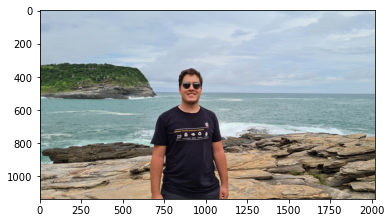

In [348]:
img_color = cv2.imread("lindo.jpg")
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.imshow(img_rgb)

In [349]:
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#ff0e00',
    disabled=False
)

In [392]:
colorpicker

ColorPicker(value='#ff3200', description='Escolha uma cor')

In [393]:
hsv1, hsv2 = aux.ranges(colorpicker.value)

In [394]:
hsv1, hsv2

(array([ 0, 50, 50], dtype=uint8), array([ 10, 255, 255], dtype=uint8))

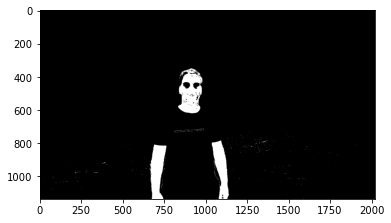

In [395]:
mask = cv2.inRange(img_hsv, hsv1, hsv2)   
plt.imshow(mask, cmap="gray")

In [396]:
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

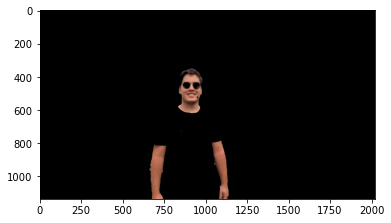

In [397]:
selecao = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
selecao = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(selecao)

In [398]:
img_bonita = cv2.cvtColor(selecao, cv2.COLOR_RGB2BGR)
mask_bonita = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
cv2.imwrite("sim.png", img_bonita)
cv2.imwrite("mask_sim.png", mask_bonita)

True

In [399]:
img_color = cv2.imread("lindo.jpg")
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

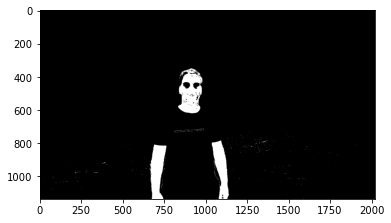

In [400]:
cor_menor1 = np.array([ 0, 50, 50])
cor_maior1 = np.array([ 10, 255, 255])
mask_qroxo1 = cv2.inRange(img_hsv, cor_menor1, cor_maior1)

plt.imshow(mask_qroxo1, cmap='gray')

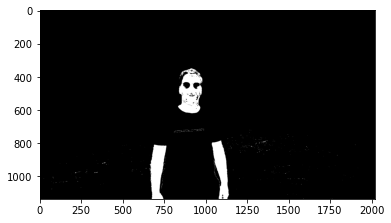

In [401]:
cor_menor2 = np.array([1, 50, 50])
cor_maior2 = np.array([10, 255, 255])
mask_qroxo2 = cv2.inRange(img_hsv, cor_menor2, cor_maior2)

plt.imshow(mask_qroxo2, cmap='gray')

In [402]:
contornos, arvore = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
len(contornos)

13

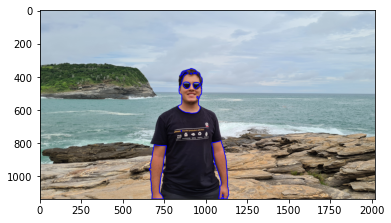

In [403]:
contornos_img = img_rgb.copy()
cv2.drawContours(contornos_img, contornos, -1, [0, 0, 255], 3);
plt.imshow(contornos_img)

In [404]:
contours, hierarchy = cv2.findContours(mask_qroxo1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
# encontra o contorno de maior área
maior_area = 0
contorno_maior_area = None
# O laço de repetição do Python funciona como o for-each do Java
for contorno in contours:
    # Calcula a área
    area = cv2.contourArea(contorno)
    if area > maior_area:
        maior_area = area 
        contorno_maior_area = contorno

# Transforma a máscara em imagem colorida
mask_cor = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
# Desenha o maior contornos de verde
mask_cor = cv2.drawContours(mask_cor, [contorno_maior_area], contourIdx=0, color=(0,255,0))

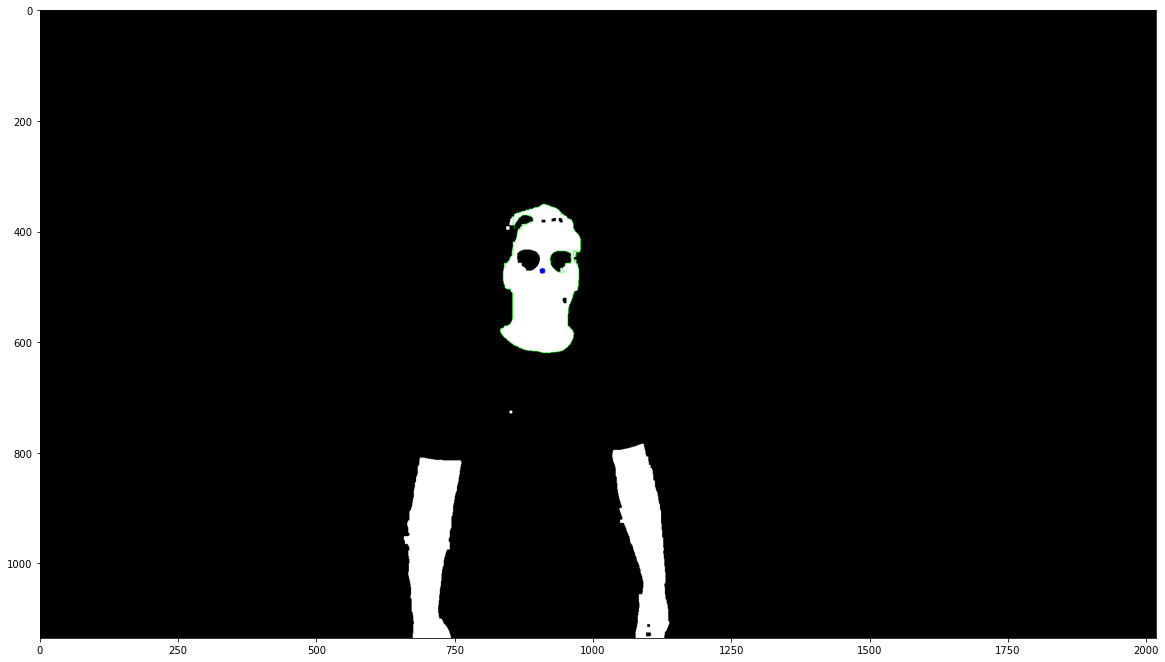

In [405]:
# Calcula e mostra o centro de massa
centro_x = contorno_maior_area[:,:,0].mean()
centro_y = contorno_maior_area[:,:,1].mean()
cv2.circle(mask_cor, (int(centro_x), int(centro_y)), radius=5, color=(255,0,0), thickness=-1) 

plt.figure(figsize=(20,20))
plt.imshow(mask_cor[:,:,::-1])